In [1]:
from utils import *

In [2]:
def saveNCrop(img_path, xys, grid_size=64, ratio=10, offset=5):
    # offset between img and loc
    # img = cv2.imread(img_path)
    loc = img_path[:-3] + "txt"
    smlm = pd.read_table(loc, header=0)
    # xyz = smlm[["Xc","Yc","Zc"]]
    for xy in xys:
        cropped = smlm.loc[
            (xy[1] / (ratio + offset) <= smlm["Xc"])
            & (smlm["Xc"] <= ((xy[1] + grid_size + offset)) / ratio)
            & (xy[0] / (ratio + offset) <= smlm["Yc"])
            & (smlm["Yc"] <= (xy[0] + grid_size + offset) / ratio)
        ]
        cropped.loc[:, "Xc"] = cropped["Xc"] * ratio - xy[1] - offset
        cropped.loc[:, "Yc"] = cropped["Yc"] * ratio - xy[0] - offset
        sub_path = (
            "/".join(img_path.split("/")[:-1])
            + "/sub_"
            + img_path.split("/")[-1][:-4]
            + "_x"
            + str(xy[1])
            + "_y"
            + str(xy[0])
            + "_grid"
            + str(grid_size)
        )
        #cropped.to_csv(sub_path + ".txt", index=False)
        xc = np.array(cropped["Xc"].tolist()).astype(np.int32)
        yc = np.array(cropped["Yc"].tolist()).astype(np.int32)
        img = grid2D(
            np.zeros([grid_size, grid_size], dtype=np.int32),
            xc,
            yc,
            grid_size,
            grid_size,
            len(xc),
        )
        np.save(sub_path,img)
        g = cv2.getGaussianKernel(3, sigma=1)
        kernel = g * g.T
        nimg = scipy.signal.fftconvolve(img, kernel, mode="same")
        plt.imshow(nimg.T)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.savefig(
            sub_path + ".png",
            facecolor=None,
            edgecolor=None,
            bbox_inches="tight",
            pad_inches=0.0,
        )
        plt.close('all')

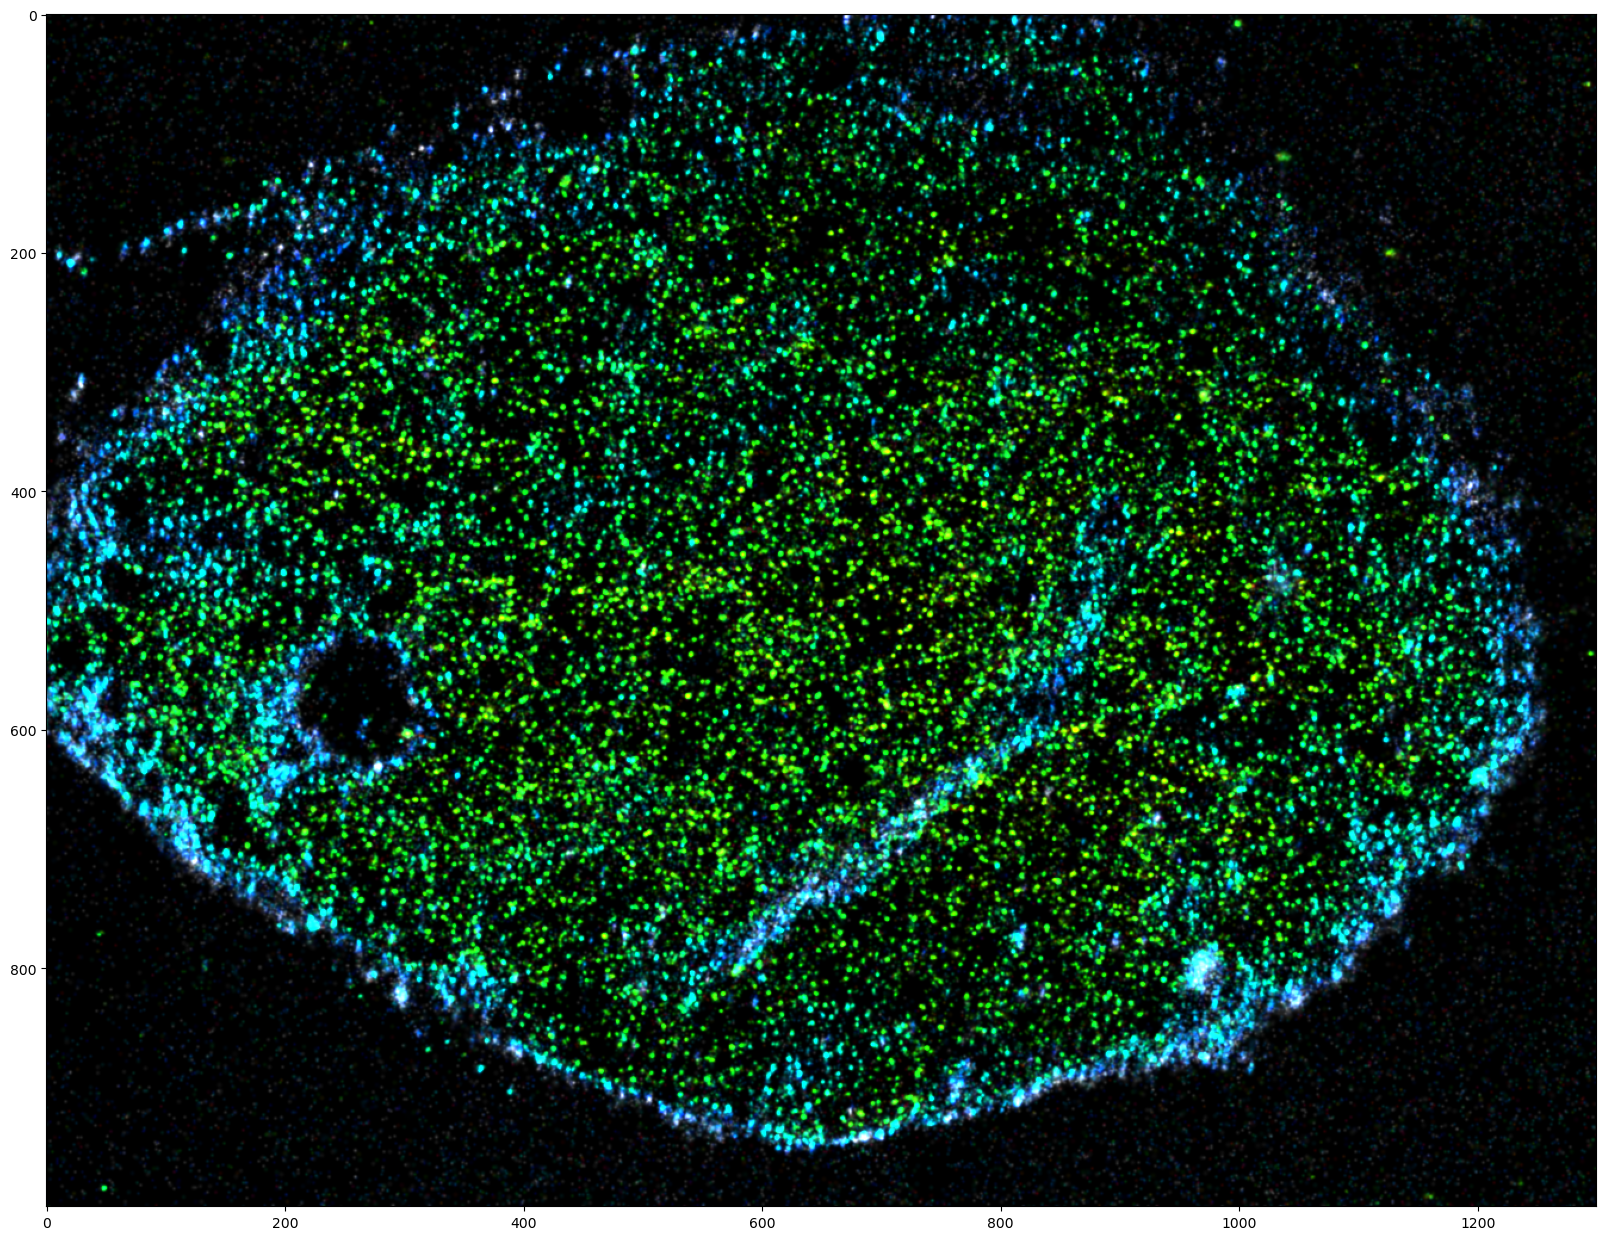

In [3]:
# img_path="../data/rendered/soma/0227_11.png"
# x0, y0, sx, sy=1050, 900, 700, 800

# img_path="../data/rendered/soma/0227_20.png"
# x0, y0, sx, sy=900, 700, 950, 950

img_path="../data/rendered/soma/0227_21.png"
x0, y0, sx, sy=800, 500, 1000, 1300
pad=100
grid_size = 64

img = cv2.imread(img_path)
plt.figure(figsize=[20,20])
plt.imshow(img[x0:x0+sx,y0:y0+sy])
xys=[]
for i in range(pad,sx-pad,64):
    for j in range(pad,sy-pad,64):
        x = i
        y = j
        if np.sum(img[x0+x:x0+64+x,y0+y:y0+y+64]) > 100000:
            xys.append([x0+x, y0+y])
            plt.gca().add_patch(Rectangle((y,x),64,64,linewidth=3,edgecolor="red",facecolor='none'))
        #plt.figure()

#print(xys)
#saveNCrop(img_path, xys)
        #plt.imshow(img[xy[0]:xy[0]+grid_size,xy[1]:xy[1]+grid_size])



In [ ]:
smlm = pd.read_csv(sub_path+'.txt', header=0)
xc=np.array(smlm["Xc"].tolist()).astype(np.int32)
yc=np.array(smlm["Yc"].tolist()).astype(np.int32)
img = grid2D(np.zeros([grid_size,grid_size], dtype=np.int32),xc,yc,grid_size,grid_size,len(xc))
g = cv2.getGaussianKernel(3, sigma=1)
kernel = g*g.T
nimg = scipy.signal.fftconvolve(img, kernel, mode='same')
plt.imshow(nimg)

In [ ]:
img_path="../data/rendered/soma/0227_9.png"
img = cv2.imread(img_path)
plt.figure(figsize=[20,20])
plt.imshow(img[800+64*3:1600,800+64*3:1600])
for i in range(50,400,64):
    for j in range(60,500,64):
        x = i
        y = j
        xy = [800+x+64*3, 800+64*3+y]
        plt.gca().add_patch(Rectangle((y,x),64,64,linewidth=3,edgecolor="red",facecolor='none'))
        #plt.figure()
        grid_size = 64
        #a,b=saveCrop(img_path, xy)
        #plt.imshow(img[xy[0]:xy[0]+grid_size,xy[1]:xy[1]+grid_size])

In [ ]:
img_path="../data/rendered/soma/1226_5.png"
img = cv2.imread(img_path)
plt.figure(figsize=[20,20])
plt.imshow(img[800:1400,1100:1700])
for i in range(30,500,64):
    for j in range(0,560,64):
        x = i
        y = j
        xy = [800+x, 1100+y]
        #plt.gca().add_patch(Rectangle((y,x),64,64,linewidth=3,edgecolor="red",facecolor='none'))
        #plt.figure()
        grid_size = 64
        a,b=saveCrop(img_path, xy)
        #plt.imshow(img[xy[0]:xy[0]+grid_size,xy[1]:xy[1]+grid_size])

In [ ]:
for i in range(2,7):
    print(i)
    g = cv2.getGaussianKernel(3, sigma=i/4)
    kernel = g*g.T

    img = scipy.signal.fftconvolve(img, kernel, mode='same')
    plt.figure()
    #plt.imshow(img)
    vxs = lmax_loc(None,None,nimg,adapt=55,local=7,sm=3,plot=1)[1]

In [ ]:
sub_path = "sub_"+img_path.split("/")[-1][:-3]+"_x"+str(xy[1])+"_y"+str(xy[0])+"_grid"+str(grid_size)
cropped.to_csv(sub_path, index=False)
